<a href="https://colab.research.google.com/github/Rathan4010/Airbnb-Bookings-Analysis/blob/main/My_Individual_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [12]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Airbnb NYC 2019.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [14]:
df = pd.read_csv(path)

In [15]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
df.shape

(48895, 16)

In [17]:
df.describe()



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [18]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### data cleaning

In [19]:
#since last_review and reviews_per_month columns has huge number of null values , they are supposed to be eliminated 
# latitude and longitude are also being eliminated since they are geographical entites and has nothing to do with data analysis in this project

In [20]:
filtered_df = df.drop(labels=['last_review','reviews_per_month','latitude','longitude'] , axis=1)

In [21]:
filtered_df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [22]:
# finding the indices of null values of column ['name']

null_indices_name =  filtered_df[df['name'].isnull()].index.tolist()
null_indices_name


[2854,
 3703,
 5775,
 5975,
 6269,
 6567,
 6605,
 8841,
 11963,
 12824,
 13059,
 13401,
 15819,
 16071,
 18047,
 28889]

In [23]:
#since the number of null values in 'name' column are negligible in the data set i.e 16,  replacing the null values in column 'name' with 'anonymous' 
filtered_df["name"].fillna('anonymous', inplace = True)
#picking up a null element from 'name' column just for checking if it is replaced with 'anonymous'
filtered_df.loc[2854,'name']

'anonymous'

In [24]:
#since the number of null values in 'host_name' column are negligible in the data set i.e 21, they are being replaced with 'unknown' 
filtered_df["host_name"].fillna('unknown', inplace = True)
filtered_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,6,2


In [25]:
# It is clear that there are no null values in the data frame
filtered_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

DATA VISUALIZATION  

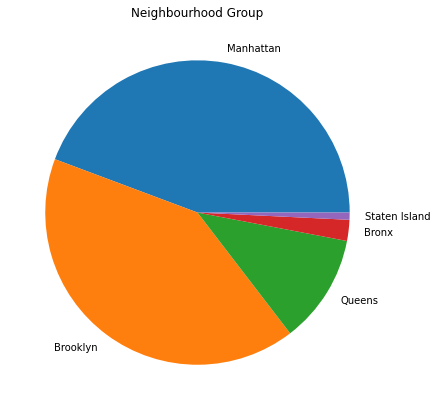

In [26]:
# using a pie chart to display the neighbourhood group

plt.figure (figsize = (7,7))
nb_group_pie = plt.pie(filtered_df.neighbourhood_group.value_counts(), labels= filtered_df.neighbourhood_group.value_counts().index)
plt.title("Neighbourhood Group")
plt.show()

Text(0.5, 1.0, 'ROOM TYPE')

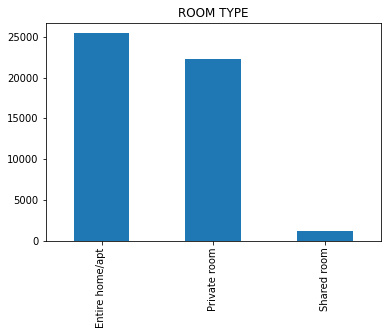

In [27]:


filtered_df['room_type'].value_counts().plot(kind='bar')
plt.title('ROOM TYPE')

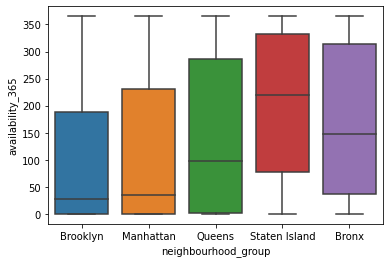

In [28]:
#Exploring neighbourhood and availability of room

ax = sns.boxplot(data=filtered_df, x='neighbourhood_group',y='availability_365')

Top 20 most expensive locality in Airbnb listing are :


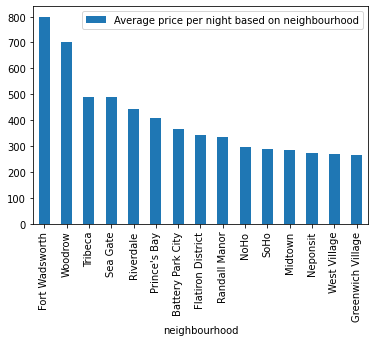

,Average price per night based on neighbourhood
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418
Sea Gate,487.857143
Riverdale,442.090909
Prince's Bay,409.500000
Battery Park City,367.557143
Flatiron District,341.925000
Randall Manor,336.000000


In [29]:
# Displaying expensive neighbourhoods

print('Top 20 most expensive locality in Airbnb listing are :')
nb_expense = filtered_df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

nb_expense.plot(kind='bar')
plt.show()
pd.DataFrame(nb_expense)

Top 20 Least expensive locality in Airbnb listing are :


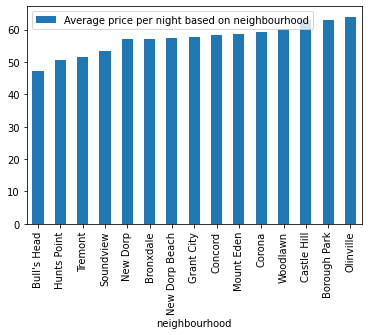

,Average price per night based on neighbourhood
neighbourhood,
Bull's Head,47.333333
Hunts Point,50.500000
Tremont,51.545455
Soundview,53.466667
New Dorp,57.000000
Bronxdale,57.105263
New Dorp Beach,57.400000
Grant City,57.666667
Concord,58.192308


In [30]:
# Displaying cheapest neighbourhoods

print('Top 20 Least expensive locality in Airbnb listing are :')
nb_least = filtered_df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
                                                                                                              ascending=True).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

nb_least.plot(kind='bar')
plt.show()
pd.DataFrame(nb_least)


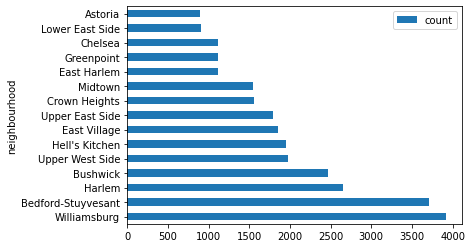

,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
...,...
Richmondtown,1
Willowbrook,1
Fort Wadsworth,1


In [31]:
#Majority of neighbourhood

nb_majority= filtered_df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})


nb_majority.head(15).plot(kind='barh')
plt.show()
pd.DataFrame(nb_majority)

Least Listing number of count


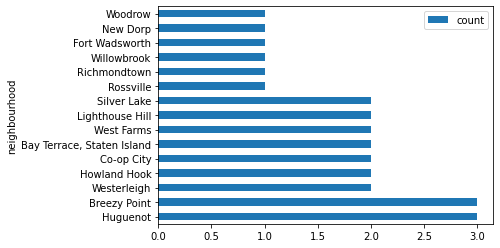

,count
neighbourhood,
Huguenot,3
Breezy Point,3
Westerleigh,2
Howland Hook,2
Co-op City,2
"Bay Terrace, Staten Island",2
West Farms,2
Lighthouse Hill,2
Silver Lake,2


In [32]:
#Least listings

print('Least Listing number of count')
df5 = filtered_df.groupby('neighbourhood')[['neighbourhood','host_name']].agg(['count']
                                                                   )['host_name'].sort_values(by='count',ascending=False).rename(index=str,columns={'Count':'Listing Count'})

df5.tail(15).plot(kind='barh')
plt.show()
pd.DataFrame(df5.tail(15))

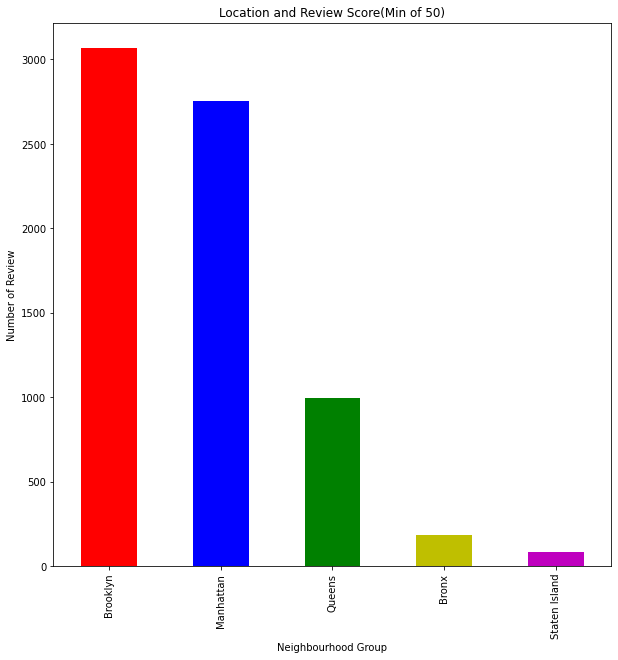

 Count of Review v/s neighbourhood group


,neighbourhood_group
Brooklyn,3065
Manhattan,2751
Queens,997
Bronx,187
Staten Island,81


In [33]:
#Location and reviews

fig = plt.figure(figsize=(10,10))
review_50 = filtered_df[filtered_df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

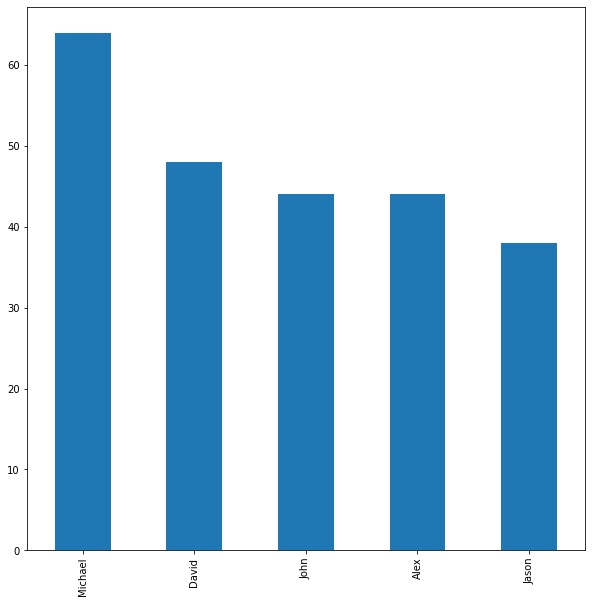

In [34]:
#Top 5 hosts

plt.figure(figsize=(10,10))
review_50.head(2)
df1 = review_50['host_name'].value_counts()[:5].plot(kind='bar')
